# Raveling Detection
## Shiva Singh , kaggle id shivasingh9927

### **Dataset Description**

The dataset consists of 2 folders: 'train' and 'test'. The folder 'train' is a labelled dataset and consists of 2 sub-folders: 'Raveling' and 'Non_raveling'. The sub-folder 'Raveling' consists of a total of 350 images containing ravening distress, while the 'Non_raveling' sub-folder contains 350 images with no raveling distress. All images are of the ‘.jpg’ format.

The ‘test’ folder consists of the test dataset images. There are a total of 700 images in this folder (all ‘.jpg’ files). These images are unlabelled i.e., the labels are not provided, whether they contain ravening distress or not. The objective of this challenge is to predict the class of each of these test images. The class can be either ‘Raveling’ or ‘Non_raveling’. The filenames of these test images are given as 1.jpg, 2.jpg, 3.jpg, …, 300.jpg.
A sample output submission file is also provided.

Dataset link-- https://www.kaggle.com/competitions/raveling-detection-ce784a-2023/data

#### **Main objective here is you cannot use conventional CNN approaches to get the desired output. Please use either ANN or Logistic to solve the problem.**


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing skimage library to read images

In [3]:
from skimage.io import imread, imshow

In [4]:
pic=imread('test/8.jpg')

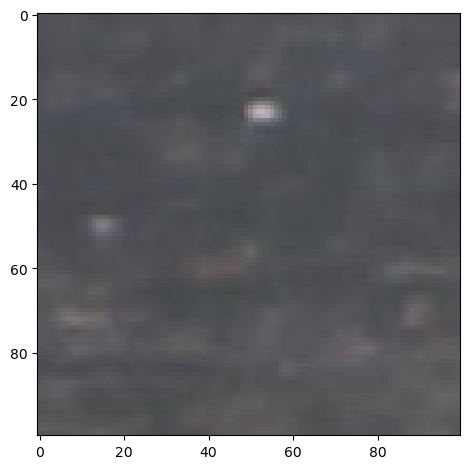

In [5]:
imshow(pic)

In [6]:
# Creating list of the names of images and then converting it to array  

In [7]:
import os

In [8]:
data_1=os.listdir('train/Non_raveling')

In [9]:
data_2=os.listdir('train/raveling')

In [10]:
data_1_array=np.array(data_1)

In [11]:
data_2_array=np.array(data_2)

In [12]:
# Creating list of the names of images from test file and then converting it to array  

In [13]:
test_data=os.listdir('test')

In [14]:
test_data=np.array(test_data)

In [15]:
# Concatenating Non_raveling and raveling array
data=np.concatenate([data_1,data_2])

In [16]:
type(data)

numpy.ndarray

In [17]:
# Storing the images in the list 
image_data=[]
test_image_data=[]
for i in data_1_array:
    image=imread('train/Non_raveling/'+i)
    image_data.append(image)
for j in data_2_array:
    image1=imread('train/raveling/'+j)
    image_data.append(image1)
# Storing the test images in the list 
for k in test_data:
    image2=imread('test/'+k)
    test_image_data.append(image2)

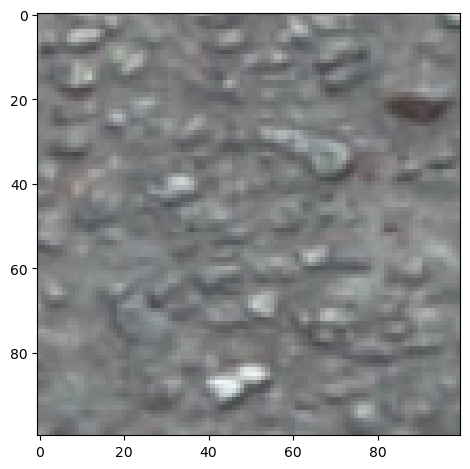

In [18]:
imshow(image_data[1])

In [19]:
#converting list to array
image_data=np.array(image_data)

In [20]:
image_data.shape

(700, 100, 100, 3)

In [21]:
image_data

array([[[[126, 136, 138],
         [128, 136, 139],
         [132, 137, 140],
         ...,
         [112, 112, 114],
         [112, 112, 114],
         [111, 111, 113]],

        [[132, 140, 143],
         [136, 141, 145],
         [140, 145, 148],
         ...,
         [111, 111, 113],
         [110, 110, 112],
         [107, 107, 109]],

        [[141, 146, 149],
         [145, 149, 152],
         [151, 155, 158],
         ...,
         [111, 109, 112],
         [108, 106, 109],
         [105, 103, 106]],

        ...,

        [[133, 137, 140],
         [134, 138, 141],
         [133, 137, 140],
         ...,
         [144, 144, 144],
         [148, 148, 146],
         [154, 154, 152]],

        [[134, 138, 141],
         [133, 137, 140],
         [132, 136, 139],
         ...,
         [135, 135, 135],
         [138, 138, 138],
         [143, 143, 143]],

        [[132, 136, 139],
         [132, 136, 139],
         [131, 135, 138],
         ...,
         [125, 125, 127],
        

Creating features - mean, standard deviation, skew, kurtosis

In [22]:
# forming list of mean pixel values
mean_pix_val=[]
for i in image_data:
    m=np.mean(i, axis=(0,1,2))
    mean_pix_val.append(m)
# forming list of mean pixel values for test dataset
test_mean_pix_val=[]
for i in test_image_data:
    mt=np.mean(i, axis=(0,1,2))
    test_mean_pix_val.append(mt)

In [23]:
mean_pix_val=np.array(mean_pix_val)
test_mean_pix_val=np.array(test_mean_pix_val)
mean_pix_val.shape

(700,)

In [24]:
# forming list of std. dev of pixel values

In [25]:
std_pix_val=[]
for i in image_data:
    s=np.std(i, axis=(0,1,2))
    std_pix_val.append(s)
std_pix_val=np.array(std_pix_val)
# forming list of std. dev of pixel values for test dataset
test_std_pix_val=[]
for i in test_image_data:
    st=np.std(i, axis=(0,1,2))
    test_std_pix_val.append(st)
test_std_pix_val=np.array(test_std_pix_val)

In [26]:
# forming list of skewness of pixel values
from scipy.stats import skew,kurtosis,entropy
skew_pix_val=[]
for i in image_data:
    skw=skew(i, axis=(0,1,2))
    skew_pix_val.append(skw)
skew_pix_val=np.array(skew_pix_val)

In [27]:
# forming list of skewness of pixel values for test dataset
test_skew_pix_val=[]
for i in test_image_data:
    skwt=skew(i, axis=(0,1,2))
    test_skew_pix_val.append(skwt)
test_skew_pix_val=np.array(test_skew_pix_val)

In [28]:
# forming list of kurtosis of pixel values
kurtosis_pix_val=[]
for i in image_data:
    kurt=kurtosis(i, axis=(0,1,2))
    kurtosis_pix_val.append(kurt)
kurtosis_pix_val=np.array(kurtosis_pix_val)

In [29]:
# forming list of kurtosis of pixel values for test dataset
test_kurtosis_pix_val=[]
for i in test_image_data:
    kurt=kurtosis(i, axis=(0,1,2))
    test_kurtosis_pix_val.append(kurt)
test_kurtosis_pix_val=np.array(test_kurtosis_pix_val)

In [30]:
# forming list of entropy of pixel values
entropy_pix_val=[]
for i in image_data:
    en=entropy(i, axis=(0,1,2))
    entropy_pix_val.append(en)
entropy_pix_val=np.array(entropy_pix_val)
entropy_pix_val.shape

(700,)

In [31]:
# forming list of entropy of pixel values for test dataset
test_entropy_pix_val=[]
for i in test_image_data:
    en=entropy(i, axis=(0,1,2))
    test_entropy_pix_val.append(en)
test_entropy_pix_val=np.array(test_entropy_pix_val)
test_entropy_pix_val.shape

(300,)

In [32]:
# Creating a dataframe combining all the features
new_df=pd.DataFrame(data=[mean_pix_val,std_pix_val,skew_pix_val,kurtosis_pix_val,entropy_pix_val])
new_df=new_df.T
new_df

,0,1,2,3,4
0,132.075167,20.691628,-0.599329,-0.096310,10.296128
1,124.825967,18.473545,0.769152,3.496092,10.298198
2,125.316367,24.125749,0.724057,0.224423,10.290959
3,110.466067,27.370291,-0.162943,1.021406,10.276191
4,102.588600,22.029635,1.055838,3.189963,10.286821
...,...,...,...,...,...
695,105.635100,35.913880,0.954520,0.632459,10.254260
696,150.960333,40.150798,-0.770831,0.082822,10.269263
697,136.866967,41.484044,-0.413756,-0.523858,10.258570
698,124.770100,28.872863,0.296454,-0.350241,10.282158


In [33]:
# Creating a dataframe combining all the features for test dataset
new_test_df=pd.DataFrame(data=[test_mean_pix_val,test_std_pix_val,test_skew_pix_val,test_kurtosis_pix_val,test_entropy_pix_val])
new_test_df=new_test_df.T
new_test_df

,0,1,2,3,4
0,117.774233,29.084056,0.846049,0.584165,10.279674
1,123.148967,38.228421,-0.355286,0.217718,10.255197
2,165.133533,20.620159,-1.237976,0.750324,10.300663
3,127.832533,31.910661,0.130999,-0.583111,10.277302
4,128.616167,43.523072,0.282472,-0.407650,10.250348
...,...,...,...,...,...
295,133.119133,19.252292,0.454380,0.774956,10.298595
296,125.671433,28.676888,-0.541251,0.295358,10.280825
297,121.817600,28.018798,0.241347,-0.570849,10.282436
298,152.408300,31.887970,-0.523806,-0.127514,10.285663


In [34]:
new_df.columns=['mean','std','skew','kurtosis','entropy']
new_df

,mean,std,skew,kurtosis,entropy
0,132.075167,20.691628,-0.599329,-0.096310,10.296128
1,124.825967,18.473545,0.769152,3.496092,10.298198
2,125.316367,24.125749,0.724057,0.224423,10.290959
3,110.466067,27.370291,-0.162943,1.021406,10.276191
4,102.588600,22.029635,1.055838,3.189963,10.286821
...,...,...,...,...,...
695,105.635100,35.913880,0.954520,0.632459,10.254260
696,150.960333,40.150798,-0.770831,0.082822,10.269263
697,136.866967,41.484044,-0.413756,-0.523858,10.258570
698,124.770100,28.872863,0.296454,-0.350241,10.282158


In [35]:
# Finally naming the columns of the test dataframe
new_test_df.columns=['mean','std','skew','kurtosis','entropy']
new_test_df

,mean,std,skew,kurtosis,entropy
0,117.774233,29.084056,0.846049,0.584165,10.279674
1,123.148967,38.228421,-0.355286,0.217718,10.255197
2,165.133533,20.620159,-1.237976,0.750324,10.300663
3,127.832533,31.910661,0.130999,-0.583111,10.277302
4,128.616167,43.523072,0.282472,-0.407650,10.250348
...,...,...,...,...,...
295,133.119133,19.252292,0.454380,0.774956,10.298595
296,125.671433,28.676888,-0.541251,0.295358,10.280825
297,121.817600,28.018798,0.241347,-0.570849,10.282436
298,152.408300,31.887970,-0.523806,-0.127514,10.285663


In [36]:
# Adding a column for which 0 represent Non raveling and 1 represent raveling
y1=np.zeros(350)
y2=np.ones(350)
y=np.concatenate([y1,y2])
y=pd.DataFrame(y,columns=['y'])

In [37]:
new_df=pd.concat([new_df,y],axis=1)

In [38]:
new_df

,mean,std,skew,kurtosis,entropy,y
0,132.075167,20.691628,-0.599329,-0.096310,10.296128,0.0
1,124.825967,18.473545,0.769152,3.496092,10.298198,0.0
2,125.316367,24.125749,0.724057,0.224423,10.290959,0.0
3,110.466067,27.370291,-0.162943,1.021406,10.276191,0.0
4,102.588600,22.029635,1.055838,3.189963,10.286821,0.0
...,...,...,...,...,...,...
695,105.635100,35.913880,0.954520,0.632459,10.254260,1.0
696,150.960333,40.150798,-0.770831,0.082822,10.269263,1.0
697,136.866967,41.484044,-0.413756,-0.523858,10.258570,1.0
698,124.770100,28.872863,0.296454,-0.350241,10.282158,1.0


Creating the model and testing the data

In [39]:
# Applying Train-test split and breaking data 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( new_df.drop(columns='y',axis=1), new_df['y'], test_size=0.3, random_state=42)
X_train.shape

(490, 5)

In [42]:
y_train.shape

(490,)

In [43]:
# Standradising the data

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
# Training our model 
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [47]:
#predicting the data
pred=logmodel.predict(X_test)
pred

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1.])

In [48]:
# checking the accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       118
         1.0       0.70      0.90      0.79        92

    accuracy                           0.79       210
   macro avg       0.80      0.80      0.79       210
weighted avg       0.82      0.79      0.79       210



Predicting the class using given test dataset

In [56]:
# Final Prediction for test
test_pred=logmodel.predict(new_test_df)
test_pred

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [50]:
# Creating .CSV in the give submission format
test_pred=pd.DataFrame(test_pred)
test_data=pd.DataFrame(test_data)
test_pred_1=pd.concat([test_data,test_pred],axis=1)

In [51]:
test_pred_1.columns=['filename','class']

In [52]:
test_pred_1=test_pred_1.set_index('filename')
test_pred_1

,class
filename,
1.jpg,1.0
10.jpg,1.0
100.jpg,1.0
101.jpg,1.0
102.jpg,1.0
...,...
95.jpg,1.0
96.jpg,1.0
97.jpg,1.0


In [53]:
test_pred_1['class']=np.where(test_pred_1['class']==1,'Raveling','Nonraveling')
test_pred_1

,class
filename,
1.jpg,Raveling
10.jpg,Raveling
100.jpg,Raveling
101.jpg,Raveling
102.jpg,Raveling
...,...
95.jpg,Raveling
96.jpg,Raveling
97.jpg,Raveling


In [54]:
# Finally saving the csv file

In [55]:
test_csv_data = test_pred_1.to_csv('test_pred_1.csv', index = True)
print('\nCSV String:\n', test_csv_data)


CSV String:
 None
